In [1]:
import sys
print(sys.executable)

/usr/bin/python3


In [2]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/paddy-disease-classification/train_images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/paddy-disease-classification/train_images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [4]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [5]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          15,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = '/kaggle/input/paddy-disease-classification/train_images'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)



Number of classes: 10


In [8]:
# -------------------- Training --------------------
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

rice_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[early_stopping]
)

#training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.2215 - loss: 2.2535 - val_accuracy: 0.4315 - val_loss: 1.6884
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.4117 - loss: 1.7058 - val_accuracy: 0.4762 - val_loss: 1.5542
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.5145 - loss: 1.4120 - val_accuracy: 0.6194 - val_loss: 1.1765
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.6290 - loss: 1.0958 - val_accuracy: 0.7069 - val_loss: 0.9314
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.7408 - loss: 0.7919 - val_accuracy: 0.8011 - val_loss: 0.6537
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.8106 - loss: 0.5737 - val_accuracy: 0.8222 - val_loss: 0.6404
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.8604 - loss: 0.4305 - val_accuracy: 0.8366 - val_loss: 0.5860
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9057 - loss: 0.2875 -

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

261/261 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9739 - loss: 0.0957
Training accuracy: 0.9798222184181213


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8934 - loss: 0.4173
Validation accuracy: 0.8990869522094727


In [13]:
cnn.save('/kaggle/working/rice_model.keras')

In [17]:
rice_history.history #Return Dictionary of history

{'accuracy': [0.2833293378353119,
  0.43910640478134155,
  0.5547682046890259,
  0.66766756772995,
  0.7685563564300537,
  0.8404996395111084,
  0.8772519826889038,
  0.919889509677887,
  0.9382656812667847,
  0.945472002029419],
 'loss': [2.026780366897583,
  1.6208678483963013,
  1.306039810180664,
  0.9910910725593567,
  0.7113669514656067,
  0.4888451397418976,
  0.3725908696651459,
  0.24672403931617737,
  0.19418959319591522,
  0.16922305524349213],
 'val_accuracy': [0.43152329325675964,
  0.47621336579322815,
  0.6194137334823608,
  0.7068716883659363,
  0.8010571599006653,
  0.8222008943557739,
  0.8366169929504395,
  0.8664103746414185,
  0.8990869522094727,
  0.8827486634254456],
 'val_loss': [1.6884244680404663,
  1.55424165725708,
  1.176476001739502,
  0.9314239025115967,
  0.6537463068962097,
  0.6403937935829163,
  0.5859670639038086,
  0.49930906295776367,
  0.40940096974372864,
  0.4249321222305298]}

In [18]:
import json
with open('/kaggle/working/rice_model.json','w') as f:
  json.dump(rice_history.history,f)

In [19]:
print(rice_history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


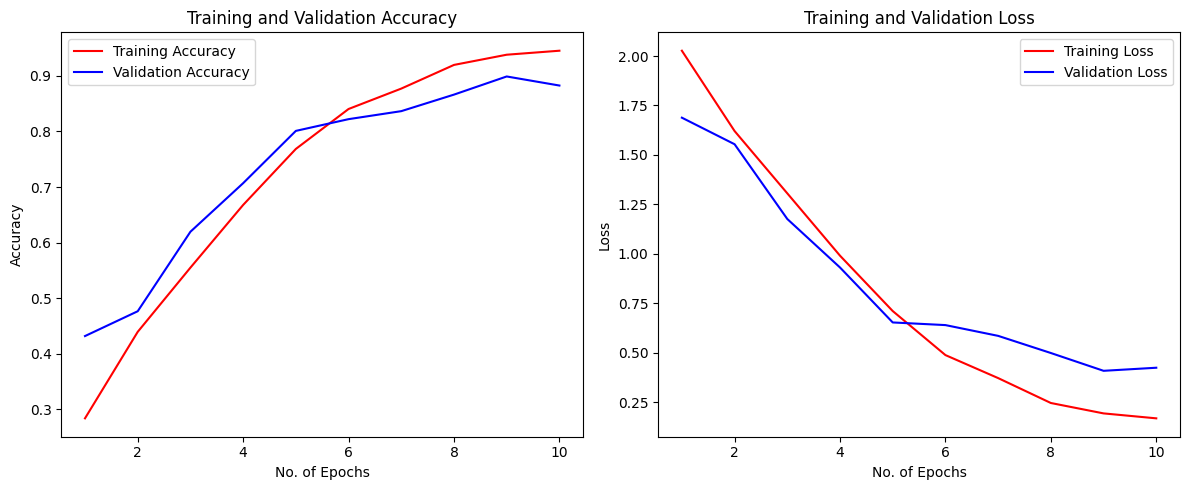

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Now we have 10 epochs

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting training and validation accuracy on the first subplot
axes[0].plot(epochs, rice_history.history['accuracy'], color='red', label='Training Accuracy')
axes[0].plot(epochs, rice_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
axes[0].set_xlabel('No. of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# Plotting training and validation loss on the second subplot
axes[1].plot(epochs, rice_history.history['loss'], color='red', label='Training Loss')
axes[1].plot(epochs, rice_history.history['val_loss'], color='blue', label='Validation Loss')
axes[1].set_xlabel('No. of Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [26]:
data_dir='/kaggle/input/paddy-disease-classification/train_images'
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


In [29]:
true_indices = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_indices, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(2081,), dtype=int64, numpy=array([0, 8, 8, ..., 7, 8, 4])>

In [31]:
predicted_categories

<tf.Tensor: shape=(2081,), dtype=int64, numpy=array([6, 5, 8, ..., 3, 4, 8])>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
class_name = validation_set.class_names

In [34]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.05      0.04      0.05        97
   bacterial_leaf_streak       0.06      0.06      0.06        72
bacterial_panicle_blight       0.02      0.02      0.02        57
                   blast       0.19      0.20      0.20       363
              brown_spot       0.12      0.12      0.12       191
              dead_heart       0.17      0.17      0.17       307
            downy_mildew       0.08      0.09      0.09       112
                   hispa       0.14      0.15      0.14       316
                  normal       0.16      0.16      0.16       365
                  tungro       0.10      0.10      0.10       201

                accuracy                           0.14      2081
               macro avg       0.11      0.11      0.11      2081
            weighted avg       0.14      0.14      0.14      2081



In [35]:
cnn.save('/kaggle/working/rice_model.h5')